In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset
data = pd.read_csv('f2.csv')
data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  552 non-null    int64 
 1   Humidity     552 non-null    int64 
 2   Moisture     552 non-null    int64 
 3   Soil_Type    552 non-null    object
 4   Crop_Type    552 non-null    object
 5   Nitrogen     552 non-null    int64 
 6   Potassium    552 non-null    int64 
 7   Phosphorous  552 non-null    int64 
 8   Fertilizer   552 non-null    object
dtypes: int64(6), object(3)
memory usage: 38.9+ KB


In [7]:
#checking unique values
data.nunique()

Temparature    21
Humidity       34
Moisture       41
Soil_Type       5
Crop_Type      17
Nitrogen       47
Potassium      31
Phosphorous    36
Fertilizer     14
dtype: int64

In [9]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [11]:
data['Fertilizer'].unique()

array(['Urea', 'TSP', 'Superphosphate', 'Potassium sulfate.',
       'Potassium chloride', 'DAP', '28-28', '20-20', '17-17-17',
       '15-15-15', '14-35-14', '14-14-14', '10-26-26', '10-10-10'],
      dtype=object)

In [13]:
data['Crop_Type'].unique()

array(['rice', 'Wheat', 'Tobacco', 'Sugarcane', 'Pulses', 'pomegranate',
       'Paddy', 'Oil seeds', 'Millets', 'Maize', 'Ground Nuts', 'Cotton',
       'coffee', 'watermelon', 'Barley', 'kidneybeans', 'orange'],
      dtype=object)

In [14]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,552.000000,552.000000,552.000000,552,552,552.000000,552.000000,552.000000,552
unique,NaN,NaN,NaN,5,17,NaN,NaN,NaN,14
top,NaN,NaN,NaN,Loamy,Cotton,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,192,64,NaN,NaN,NaN,108
mean,28.630435,64.557971,42.840580,NaN,NaN,28.521739,10.144928,21.115942,NaN
std,5.088082,11.880236,11.507275,NaN,NaN,29.121989,13.456956,14.920514,NaN
min,0.000000,50.000000,25.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,26.000000,54.000000,33.000000,NaN,NaN,10.000000,0.000000,8.000000,NaN
50%,29.000000,62.000000,41.000000,NaN,NaN,15.000000,0.000000,20.000000,NaN
75%,32.000000,68.000000,51.000000,NaN,NaN,37.000000,18.000000,36.000000,NaN


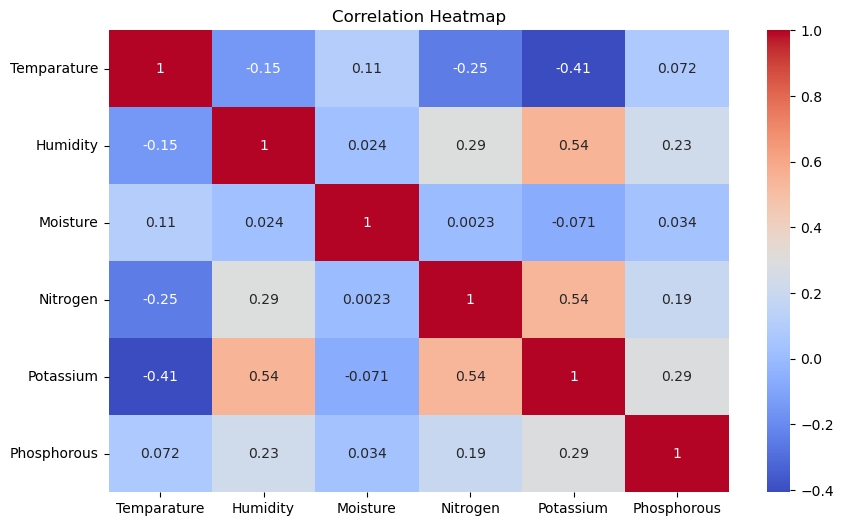

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Select only numerical columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# ✅ Heatmap for Correlation Analysis
plt.figure(figsize=(10, 6))  # Optional: Set figure size
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()


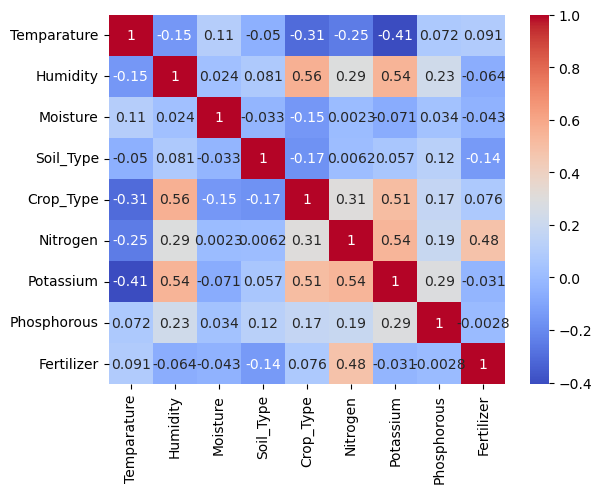

In [19]:
from sklearn.preprocessing import LabelEncoder

# ✅ Encode categorical columns
data_encoded = data.copy()
for col in data.select_dtypes(include=['object']).columns:
    data_encoded[col] = LabelEncoder().fit_transform(data[col])

# ✅ Now calculate correlation & plot heatmap
sns.heatmap(data_encoded.corr(), annot=True, cmap="coolwarm")
plt.show()


In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame (replace with your actual dataset)
data = pd.DataFrame({'Soil_Type': ['Black', 'Clayey', 'Loamy', 'Red', 'Sandy']})

# Encoding Soil Type variable
encode_soil = LabelEncoder()
data['Encoded'] = encode_soil.fit_transform(data['Soil_Type'])

# Creating DataFrame with actual names and encoded values
Soil_Type = pd.DataFrame({
    'Original': encode_soil.classes_,  # Using actual soil type names
    'Encoded': encode_soil.transform(encode_soil.classes_)  # Ensuring correct encoded values
})

# Setting 'Original' as index
Soil_Type = Soil_Type.set_index('Original')

# Display the DataFrame
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame (Replace with your actual dataset)
data = pd.DataFrame({'Crop_Type': ['Wheat', 'Rice', 'Maize', 'Barley', 'Soybean']})

# Encoding Crop Type variable
encode_crop = LabelEncoder()
data['Encoded'] = encode_crop.fit_transform(data['Crop_Type'])

# Creating DataFrame with actual crop names and encoded values
Crop_Type = pd.DataFrame({
    'Original': encode_crop.classes_,  # Using actual crop names
    'Encoded': encode_crop.transform(encode_crop.classes_)  # Ensuring correct encoded values
})

# Setting 'Original' as index
Crop_Type = Crop_Type.set_index('Original')

# Display the DataFrame
Crop_Type


,Encoded
Original,
Barley,0
Maize,1
Rice,2
Soybean,3
Wheat,4


In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame with Fertilizers
data = pd.DataFrame({'Fertilizer': [
    "10-10-10", "10-26-26", "14-14-14", "14-35-14", "15-15-15", 
    "17-17-17", "20-20", "28-28", "DAP", "Potassium chloride", 
    "Potassium sulfate", "Superphosphate", "TSP", "Urea"
]})

# Encoding Fertilizer variable
encode_fertilizer = LabelEncoder()
data['Encoded'] = encode_fertilizer.fit_transform(data['Fertilizer'])

# Creating DataFrame with actual Fertilizer names and encoded values
Fertilizer = pd.DataFrame({
    'Original': encode_fertilizer.classes_,  # Using actual fertilizer names
    'Encoded': encode_fertilizer.transform(encode_fertilizer.classes_)  # Ensuring correct encoded values
})

# Setting 'Original' as index
Fertilizer = Fertilizer.set_index('Original')

# Display the DataFrame
Fertilizer


,Encoded
Original,
10-10-10,0
10-26-26,1
14-14-14,2
14-35-14,3
15-15-15,4
17-17-17,5
20-20,6
28-28,7
DAP,8


In [36]:
# Load full dataset (if you have it)
data = pd.read_csv('f2.csv')

# Check if all required features are present
print(data.head())

   Temparature  Humidity  Moisture Soil_Type Crop_Type  Nitrogen  Potassium  \
0           20        83        26    Clayey      rice        90         49   
1           25        84        32     Loamy      rice        66         59   
2           33        64        50     Loamy     Wheat        41          0   
3           34        65        54     Loamy     Wheat        38          0   
4           38        72        51     Loamy     Wheat        39          0   

   Phosphorous Fertilizer  
0           36       Urea  
1           36       Urea  
2            0       Urea  
3            0       Urea  
4            0       Urea  


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Encode categorical columns using LabelEncoder
data_encoded = data.copy()
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])  # Convert categories to numbers

# Step 2: One-Hot Encoding (if needed)
X = pd.get_dummies(data_encoded.drop(columns=['Fertilizer']), drop_first=True)  # Features
y = data_encoded['Fertilizer']  # Target variable

# Step 3: Define models
models_dict = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=2),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=2),
    "SVM": SVC(kernel='linear', random_state=2),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
}

# Step 4: Perform Cross-Validation for Each Model
for model_name, clf in models_dict.items():
    scores = cross_val_score(clf, X, y, cv=5)  # 5-Fold Cross Validation
    print(f"Cross-validation score of {model_name}: {scores.mean():.4f} ± {scores.std():.4f}")


Cross-validation score of Random Forest: 1.0000 ± 0.0000
Cross-validation score of Logistic Regression: 0.8767 ± 0.0377
Cross-validation score of SVM: 1.0000 ± 0.0000
Cross-validation score of Naive Bayes: 0.9077 ± 0.0384
Cross-validation score of Decision Tree: 0.9040 ± 0.0324


In [38]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 213 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  441 non-null    int64 
 1   Humidity     441 non-null    int64 
 2   Moisture     441 non-null    int64 
 3   Soil_Type    441 non-null    object
 4   Crop_Type    441 non-null    object
 5   Nitrogen     441 non-null    int64 
 6   Potassium    441 non-null    int64 
 7   Phosphorous  441 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 31.0+ KB


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Encode categorical columns using LabelEncoder
data_encoded = data.copy()
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])  # Convert categories to numbers

# Step 2: One-Hot Encoding (if needed)
X = pd.get_dummies(data_encoded.drop(columns=['Fertilizer']), drop_first=True)  # Features
y = data_encoded['Fertilizer']  # Target variable

# Step 3: Define models
models_dict = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=2),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=2),
    "SVM": SVC(kernel='linear', random_state=2),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
}

# Step 4: Perform Cross-Validation for Each Model
for model_name, clf in models_dict.items():
    scores = cross_val_score(clf, X, y, cv=5)  # 5-Fold Cross Validation
    print(f"Cross-validation score of {model_name}: {scores.mean():.4f} ± {scores.std():.4f}")


Cross-validation score of Random Forest: 1.0000 ± 0.0000
Cross-validation score of Logistic Regression: 0.8767 ± 0.0377
Cross-validation score of SVM: 1.0000 ± 0.0000
Cross-validation score of Naive Bayes: 0.9077 ± 0.0384
Cross-validation score of Decision Tree: 0.9040 ± 0.0324


In [40]:
acc = [] # TEST
model = []
acc1=[] # TRIAN

In [41]:
print(data.dtypes)

Temparature     int64
Humidity        int64
Moisture        int64
Soil_Type      object
Crop_Type      object
Nitrogen        int64
Potassium       int64
Phosphorous     int64
Fertilizer     object
dtype: object


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split the data first
X = data.drop(columns=['Fertilizer'])  # Features
y = data['Fertilizer']  # Target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Apply Label Encoding only on categorical columns
for col in x_train.columns:
    if x_train[col].dtype == 'object':  # Check if column is categorical
        le = LabelEncoder()
        x_train[col] = le.fit_transform(x_train[col])  # Fit & transform on training data
        x_test[col] = le.transform(x_test[col])  # Transform test data using same encoder

# Now x_train and x_test are fully numeric and ready for ML models
print("Encoding completed successfully!")



Encoding completed successfully!


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Define all models in a dictionary
models_dict = {
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5),
    "Gaussian Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='linear', random_state=2),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=2),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=2)
}

# Lists to store results
acc = []  # Test accuracy
acc1 = []  # Train accuracy
model = []  # Trained models

# Train & Evaluate Each Model
for model_name, clf in models_dict.items():
    clf.fit(x_train, y_train)  # Train model
    model.append(clf)  # Store trained model
    
    # Predictions
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)

    # Accuracy Calculation
    train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
    test_accuracy = metrics.accuracy_score(y_test, y_pred_test)

    acc1.append(train_accuracy)
    acc.append(test_accuracy)

    print(f"{model_name} Accuracy: Train = {train_accuracy * 100:.2f}%, Test = {test_accuracy * 100:.2f}%")


Decision Tree Accuracy: Train = 93.42%, Test = 90.09%
Gaussian Naive Bayes Accuracy: Train = 91.38%, Test = 94.59%
SVM Accuracy: Train = 100.00%, Test = 100.00%
Logistic Regression Accuracy: Train = 92.97%, Test = 84.68%
Random Forest Accuracy: Train = 100.00%, Test = 100.00%


In [51]:
import pickle

# Select the best model (Example: Random Forest)
best_model = models_dict["Random Forest"]  # Use the trained Random Forest model

# Save the trained model with a new name
with open('classify.pkl', 'wb') as pickle_out:
    pickle.dump(best_model, pickle_out)

print("Model saved successfully as classify.pkl!")



Model saved successfully as classify.pkl!


In [55]:
from sklearn.preprocessing import LabelEncoder

# Copy original dataset
data_encoded = data.copy()

# Identify categorical columns
categorical_cols = ['Soil_Type', 'Crop_Type']  # Add any other categorical columns here

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    data_encoded[col] = le.fit_transform(data_encoded[col])  




In [56]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Define features and target (AFTER encoding categorical data)
X = data_encoded.drop(columns=['Fertilizer'])  # Features
y = data_encoded['Fertilizer']  # Target variable

# Train the Random Forest model
RF = RandomForestClassifier(n_estimators=100, random_state=2)
RF.fit(X, y)  # Training the model

# Save the trained model
with open('classify.pkl', 'wb') as pickle_out:
    pickle.dump(RF, pickle_out)

print("✅ Model trained and saved successfully as classify.pkl!")


✅ Model trained and saved successfully as classify.pkl!


In [58]:
import pickle

# Load the trained model
model = pickle.load(open('classify.pkl', 'rb'))

# Verify if the model was trained correctly
if hasattr(model, "n_features_in_"):
    print("✅ Model loaded successfully! It expects", model.n_features_in_, "features.")
else:
    print("⚠ Error: Model is not trained correctly.")


✅ Model loaded successfully! It expects 8 features.


In [59]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Prepare label encoders
label_encoders = {}
for col in ['Soil_Type', 'Crop_Type']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Prepare Fertilizer encoder
fertilizer_encoder = LabelEncoder()
data['Fertilizer'] = fertilizer_encoder.fit_transform(data['Fertilizer'])

# Model Training
X = data.drop(columns=['Fertilizer'])
y = data['Fertilizer']
RF = RandomForestClassifier(n_estimators=100, random_state=2)
RF.fit(X, y)

# Save model + encoders
with open("fertilizer_model.pkl", "wb") as f:
    pickle.dump({
        "model": RF,
        "fertilizer_encoder": fertilizer_encoder,
        "label_encoders": label_encoders
    }, f)

print("✅ Model + Encoders saved successfully!")


✅ Model + Encoders saved successfully!


In [60]:
# Load the trained model
with open("fertilizer_model.pkl", "rb") as f:
    data = pickle.load(f)

model = data["model"]
fertilizer_encoder = data["fertilizer_encoder"]
label_encoders = data["label_encoders"]

# Example User Input (Modify as needed)
user_input = {
    "Temparature": 30,
    "Humidity": 60,
    "Moisture": 40,
    "Soil_Type": "Loamy",
    "Crop_Type": "Wheat",
    "Nitrogen": 50,
    "Potassium": 30,
    "Phosphorous": 20
}

# Encode categorical features
for col in ["Soil_Type", "Crop_Type"]:
    user_input[col] = label_encoders[col].transform([user_input[col]])[0]

# Convert input to DataFrame
input_df = pd.DataFrame([user_input])

# Predict Fertilizer
prediction = model.predict(input_df)
fertilizer_name = fertilizer_encoder.inverse_transform(prediction)[0]

print("Recommended Fertilizer:", fertilizer_name)

Recommended Fertilizer: 10-26-26


In [61]:
# Load the trained model
with open("fertilizer_model.pkl", "rb") as f:
    data = pickle.load(f)

model = data["model"]
fertilizer_encoder = data["fertilizer_encoder"]
label_encoders = data["label_encoders"]

# Example User Input (Modify as needed)
user_input = {
    "Temparature": 25,
    "Humidity": 55,
    "Moisture": 53,
    "Soil_Type": "Loamy",
    "Crop_Type": "pomegranate",
    "Nitrogen": 0,
    "Potassium": 27,
    "Phosphorous": 38
}

# Encode categorical features
for col in ["Soil_Type", "Crop_Type"]:
    user_input[col] = label_encoders[col].transform([user_input[col]])[0]

# Convert input to DataFrame
input_df = pd.DataFrame([user_input])

# Predict Fertilizer
prediction = model.predict(input_df)
fertilizer_name = fertilizer_encoder.inverse_transform(prediction)[0]

print("Recommended Fertilizer:", fertilizer_name)


Recommended Fertilizer: Superphosphate


In [62]:
import pickle

# Load trained model and encoders
with open("fertilizer_model.pkl", "rb") as f:
    data = pickle.load(f)

model = data["model"]
fertilizer_encoder = data["fertilizer_encoder"]
label_encoders = data["label_encoders"]


In [66]:
import pandas as pd

# Example User Input
user_input = {
    "Temparature": 29,
    "Humidity": 52,
    "Moisture": 45,
    "Soil_Type": "Loamy",
    "Crop_Type": "Sugarcane",
    "Nitrogen": 12,
    "Potassium": 0,
    "Phosphorous": 36
}

# Encode categorical features
for col in ["Soil_Type", "Crop_Type"]:
    user_input[col] = label_encoders[col].transform([user_input[col]])[0]

# Convert input to DataFrame
input_df = pd.DataFrame([user_input])

# Predict Fertilizer
prediction = model.predict(input_df)
fertilizer_name = fertilizer_encoder.inverse_transform(prediction)[0]

print("✅ Recommended Fertilizer:", fertilizer_name)


✅ Recommended Fertilizer: DAP
